# ERA5 precipitation climatology

* Produce the PDFs of ERA5 hourly precipitation on CONUS grid cells

In [3]:
import os
import sys
import time
import numpy as np
from glob import glob
from datetime import datetime, timedelta
from scipy.interpolate import RegularGridInterpolator

import h5py
import netCDF4 as nc

In [4]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
with h5py.File(save_dir+'CNN_domain.hdf', 'r') as h5io:
    lon_01 = h5io['lon_01'][...]
    lat_01 = h5io['lat_01'][...]
    lon_GFS = h5io['lon_GFS'][...]
    lat_GFS = h5io['lat_GFS'][...]

In [7]:
ERA5_dir = '/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_2018_2023.nc'

In [8]:
lat_lim = [158, 262]
lon_lim = [218, 459]
grid_shape = lon_GFS.shape

In [9]:
with nc.Dataset(ERA5_dir, 'r') as ncio:
    ERA5_x = ncio['longitude'][...]
    ERA5_y = ncio['latitude'][...]

ERA5_lon, ERA5_lat = np.meshgrid(ERA5_x, ERA5_y)

In [10]:
np.sum(ERA5_lat[lat_lim[0]:(lat_lim[1]+1), lon_lim[0]:(lon_lim[1]+1)] - lat_GFS)

0.0

In [11]:
ERA5_lat[lat_lim[0]:(lat_lim[1]+1), lon_lim[0]:(lon_lim[1]+1)].shape

(105, 242)

In [12]:
q_bins = np.arange(0, 1, 0.01)
N_bins = len(q_bins)
# q_ERA5 = np.load('/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile.npy')
N_hour = 24*(365+365+366+365+365)

**compute quantile by per grid cells**

In [12]:
# name_save = '/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile_i{}_j{}.npy'
# for i, ix in enumerate(range(lat_lim[0], lat_lim[1]+1, 1)):
#     for j, iy in enumerate(range(lon_lim[0], lon_lim[1]+1, 1)):
#         q_ERA5_ = q_ERA5[:, i, j]
#         if np.sum(np.isnan(q_ERA5_)) == 0:
#             print(name_save.format(i, j))
#             np.save(name_save.format(i, j), q_ERA5_)

In [13]:
i_start = 41
i_end = 42

In [15]:
name_save = '/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile_i{}_j{}.npy'
with nc.Dataset(ERA5_dir, 'r') as ncio:
    for i, ix in enumerate(range(lat_lim[0], lat_lim[1]+1, 1)):
        for j, iy in enumerate(range(lon_lim[0], lon_lim[1]+1, 1)):
            name_ = name_save.format(i, j)
            if os.path.isfile(name_) is False:
                if i >= i_start and i < i_end:
                    # compute quantiles
                    ERA5_APCP = ncio['tp'][:, 0, ix, iy]
                    ERA5_APCP = np.array(ERA5_APCP)[:N_hour]*1000
                    ERA5_APCP[ERA5_APCP<1e-7] = 0.0 # ERA5 zero = 6.93889390e-15
                    q_ERA5 = np.quantile(ERA5_APCP, q_bins)
                    # save
                    print(name_)
                    np.save(name_, q_ERA5)

/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile_i42_j1.npy
/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile_i42_j2.npy



KeyboardInterrupt



In [14]:
temp_data = np.load('/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile_i41_j157.npy')

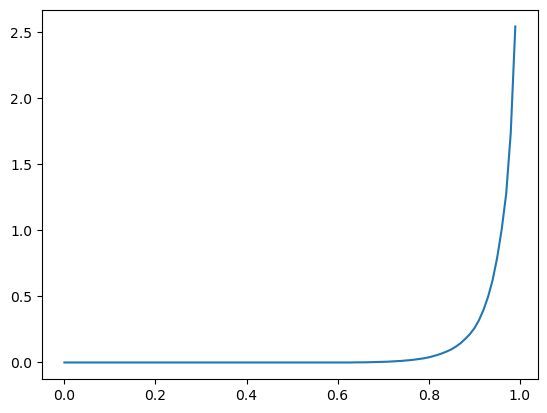

In [16]:
plt.plot(q_bins, temp_data)

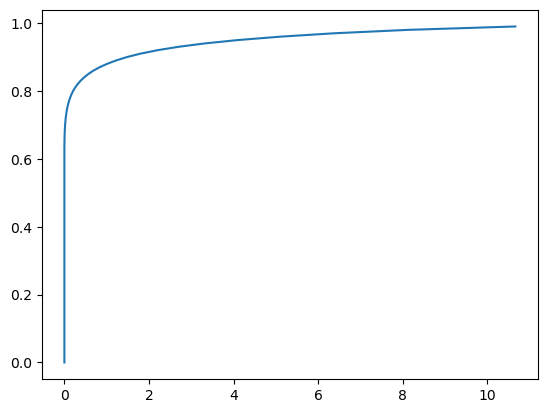

In [18]:
plt.plot(np.cumsum(temp_data), q_bins)

In [15]:
# plt.plot(q_ERA5[:, 30, -1])

In [1]:
# with nc.Dataset(ERA5_dir, 'r') as ncio:
#     for i, ix in enumerate(range(lat_lim[0], lat_lim[1]+1, 1)):
#         for j, iy in enumerate(range(lon_lim[0], lon_lim[1]+1, 1)):
#             if np.isnan(q_ERA5[-1, i, j]):
#                 ERA5_APCP = ncio['tp'][:, 0, ix, iy]
#                 ERA5_APCP = np.array(ERA5_APCP)[:N_hour]*1000
#                 ERA5_APCP[ERA5_APCP<1e-7] = 0.0 # ERA5 zero = 6.93889390e-15
#                 q_ERA5[:, i, j] = np.quantile(ERA5_APCP, q_bins)
#                 print('/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile.npy')
#                 np.save('/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile.npy', q_ERA5)
#             else:
#                 continue;